In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.proportion import proportions_ztest
np.random.seed(42)
n_A ,p_A =10_000 ,0.10
n_B ,p_B =10_000 ,0.12
success_A =np.random.binomial(n_A,p_A)
success_B =np.random.binomial(n_B,p_B)

In [2]:
def proportion_ci(successes, n, alpha=0.05):
  p_hat = successes / n
  z = stats.norm.ppf(1 - alpha/2)
  se = np.sqrt(p_hat * (1 - p_hat) / n)
  return p_hat, p_hat - z*se, p_hat + z*se
p_A_hat, ci_low_A, ci_high_A = proportion_ci(success_A, n_A)
p_B_hat, ci_low_B, ci_high_B = proportion_ci(success_B, n_B)
results = pd.DataFrame({

'Variant':['A', 'B'],
'Visitors':[n_A, n_B],
'Conversions': [success_A, success_B],
'CR (p)':[p_A_hat, p_B_hat],
'CI Lower (95%)': [ci_low_A, ci_low_B],
'CI Upper (95%)': [ci_high_A, ci_high_B],})
print(results)

  Variant  Visitors  Conversions  CR (p)  CI Lower (95%)  CI Upper (95%)
0       A     10000          973  0.0973        0.091491        0.103109
1       B     10000         1134  0.1134        0.107185        0.119615


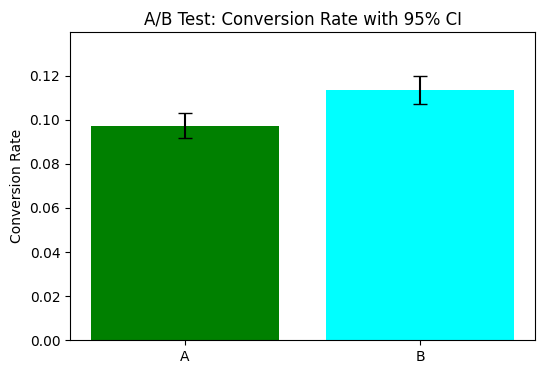

In [6]:

plt.figure(figsize=(6,4))
plt.bar(
    results['Variant'],
    results['CR (p)'],
    yerr=[
        results['CR (p)'] - results['CI Lower (95%)'],
        results['CI Upper (95%)'] - results['CR (p)']
    ],
    capsize=5,
    color=['green','aqua']
)
plt.ylabel('Conversion Rate')
plt.title('A/B Test: Conversion Rate with 95% CI')
plt.ylim(0, max(results['CI Upper (95%)']) + 0.02)
plt.show()

In [7]:

count = np.array([success_B, success_A])
nobs = np.array([n_B, n_A])

z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("→ Reject H0: Variant B has a significantly higher conversion rate.")
else:
    print("→ Fail to reject H0: No significant lift from B over A.")

Z-statistic: 3.708
P-value: 0.000
→ Reject H0: Variant B has a significantly higher conversion rate.


In [8]:
import numpy as np, matplotlib.pyplot as plt, time
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import clear_output
true_p_A, true_p_B = 0.10, 0.12
batch_size = 100
n_batches = 60

n_visits_A = n_visits_B = 0
n_succ_A = n_succ_B = 0
batches = []
p_values = []
lifts = []

Batch 30/30
 Variant A: 3000 visits, 276 buys, CR = 9.200%
 Variant B: 3000 visits, 383 buys, CR = 12.767%
 Observed lift: 3.567%
 z-stat = 4.42, p-value = 0.0000
 Significant lift detected (p < 0.05).


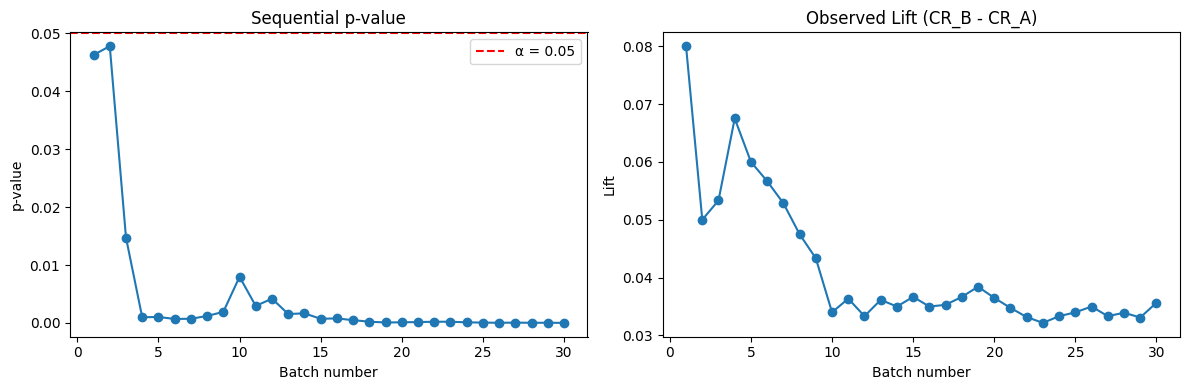

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import clear_output
import time

# Initialize values
true_p_A = 0.10  # example true conversion rate for A
true_p_B = 0.12  # example true conversion rate for B
batch_size = 100
n_batches = 30

n_visits_A = 0
n_visits_B = 0
n_succ_A = 0
n_succ_B = 0

batches = []
p_values = []
lifts = []

for batch in range(1, n_batches + 1):
    # Simulate one batch of visitors
    new_A = np.random.binomial(batch_size, true_p_A)
    new_B = np.random.binomial(batch_size, true_p_B)

    # Update totals
    n_visits_A += batch_size
    n_visits_B += batch_size
    n_succ_A += new_A
    n_succ_B += new_B

    # Compute current conversion rates
    cr_A = n_succ_A / n_visits_A
    cr_B = n_succ_B / n_visits_B
    lift = cr_B - cr_A

    # Two-proportion z-test (one-sided: B > A)
    count = np.array([n_succ_B, n_succ_A])
    nobs = np.array([n_visits_B, n_visits_A])
    z_stat, p_val = proportions_ztest(count, nobs, alternative='larger')

    # Record for plotting
    batches.append(batch)
    p_values.append(p_val)
    lifts.append(lift)

    # Clear previous output and print current stats
    clear_output(wait=True)
    print(f"Batch {batch}/{n_batches}")
    print(f" Variant A: {n_visits_A} visits, {n_succ_A} buys, CR = {cr_A:.3%}")
    print(f" Variant B: {n_visits_B} visits, {n_succ_B} buys, CR = {cr_B:.3%}")
    print(f" Observed lift: {lift:.3%}")
    print(f" z-stat = {z_stat:.2f}, p-value = {p_val:.4f}")
    if p_val < 0.05:
        print(" Significant lift detected (p < 0.05).")
    else:
        print(" No significant lift yet.")

    # Plot p-value and lift over batches
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # FIXED: `fiesize` -> `figsize`

    axes[0].plot(batches, p_values, '-o')
    axes[0].axhline(0.05, color='red', linestyle='--', label='α = 0.05')
    axes[0].set_title('Sequential p-value')
    axes[0].set_xlabel('Batch number')
    axes[0].set_ylabel('p-value')
    axes[0].legend()

    axes[1].plot(batches, lifts, '-o')  # FIXED: typo '-0' -> '-o'
    axes[1].set_title('Observed Lift (CR_B - CR_A)')
    axes[1].set_xlabel('Batch number')
    axes[1].set_ylabel('Lift')

    plt.tight_layout()
    plt.show()

    # Pause briefly to simulate real time
    time.sleep(1)


Batch 30/30
Variant A: 6000 visits, 573 buys, CR 9.550%
Variant B: 6000 visits, 737 buys, CR 12.283%
Observed lift: 2.733%
z-stat 4.80, p-value 0.0000
Significant lift detected (p<0.05).


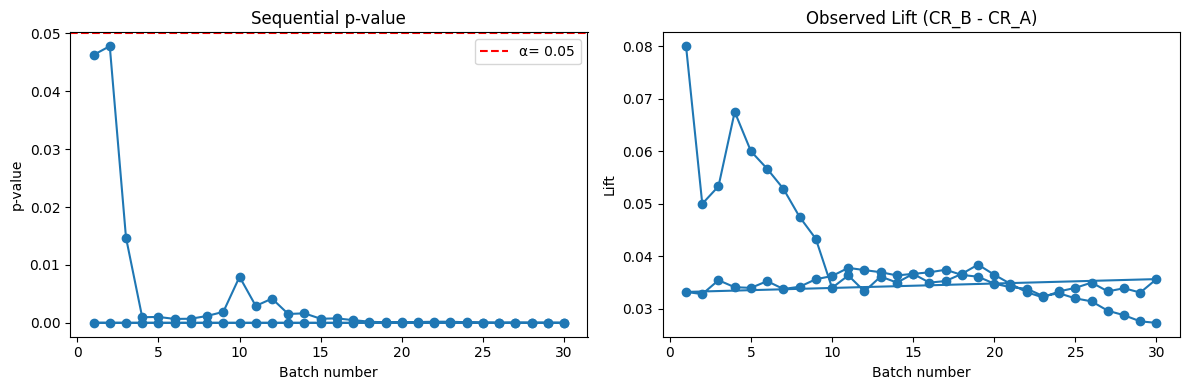

In [41]:
for batch in range(1, n_batches + 1):
    new_A = np.random.binomial(batch_size, true_p_A)
    new_B = np.random.binomial(batch_size, true_p_B)

    n_visits_A += batch_size
    n_visits_B += batch_size
    n_succ_A += new_A
    n_succ_B += new_B

    cr_A = n_succ_A / n_visits_A
    cr_B = n_succ_B / n_visits_B
    lift = cr_B - cr_A

    count = np.array([n_succ_B, n_succ_A])
    nobs = np.array([n_visits_B, n_visits_A])
    z_stat, p_val = proportions_ztest(count, nobs, alternative="larger")

    batches.append(batch)
    p_values.append(p_val)
    lifts.append(lift)

    clear_output(wait=True)
    print(f"Batch {batch}/{n_batches}")
    print(f"Variant A: {n_visits_A} visits, {n_succ_A} buys, CR {cr_A:.3%}")
    print(f"Variant B: {n_visits_B} visits, {n_succ_B} buys, CR {cr_B:.3%}")
    print(f"Observed lift: {lift:.3%}")
    print(f"z-stat {z_stat:.2f}, p-value {p_val:.4f}")

    if p_val < 0.05:
        print("Significant lift detected (p<0.05).")
    else:
        print("No significant lift yet.")

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(batches, p_values, 'o-')
    axes[0].axhline(0.05, color='red', linestyle='--', label='α= 0.05')
    axes[0].set_title('Sequential p-value')
    axes[0].set_xlabel('Batch number')
    axes[0].set_ylabel('p-value')
    axes[0].legend()

    axes[1].plot(batches, lifts, 'o-')
    axes[1].set_title('Observed Lift (CR_B - CR_A)')
    axes[1].set_xlabel('Batch number')
    axes[1].set_ylabel("Lift")

    plt.tight_layout()
    plt.show()

    time.sleep(0.9)